# Lọc user và chuyển tuổi về trẻ hơn

In [27]:
import pandas as pd
from datetime import timedelta
from datetime import datetime

In [28]:
users_df = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
user_gender_df = users_df[['UserID', 'Gender', 'Age']]
gen_dummies = user_gender_df['Gender'].str.get_dummies()
user_feat_df = (pd.concat([user_gender_df, gen_dummies], axis=1).drop(["Gender"], axis=1))


C:\Users\Admin\AppData\Local\Temp\ipykernel_33524\996885328.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])


In [29]:
def chuyen_age(df, age, toAge):
    df.loc[df['Age'] == age, 'Age'] = toAge
    return df

In [30]:
user_feat_df = chuyen_age(user_feat_df, 35, 27)
user_feat_df = chuyen_age(user_feat_df, 45, 29)
user_feat_df = chuyen_age(user_feat_df, 50, 32)
user_feat_df = chuyen_age(user_feat_df, 56, 35)
user_feat_df = chuyen_age(user_feat_df, 1, 16)
user_feat_df.head()

,UserID,Age,F,M
0,1,16,1,0
1,2,35,0,1
2,3,25,0,1
3,4,29,0,1
4,5,25,0,1


In [31]:
user_feat_df.to_csv('user.csv', index=False)

# Get và lọc rating cho product trong shoopfee chỉ có 33 product

In [32]:
interacts_df = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp']).sort_values("Timestamp")
interacts_df.sort_values(by='Timestamp')
interacts_df.rename(columns={'MovieID': 'ItemID'}, inplace=True)
interacts_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33524\3383943049.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  interacts_df = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp']).sort_values("Timestamp")


,UserID,ItemID,Rating,Timestamp
1000138,6040,858,4,956703932
1000153,6040,2384,4,956703954
999873,6040,593,5,956703954
1000007,6040,1961,4,956703977
1000192,6040,2019,5,956703977


In [33]:
interacts_df.shape

(1000209, 4)

In [34]:
mask = interacts_df['ItemID'] >= 34

In [35]:
mask

1000138    True
1000153    True
999873     True
1000007    True
1000192    True
           ... 
825793     True
825438     True
825724     True
825731     True
825603     True
Name: ItemID, Length: 1000209, dtype: bool

In [36]:
# loại bỏ những id lớn hơn 33
interacts_df = interacts_df[interacts_df['ItemID'] <= 33]

In [37]:
#  # Lấy và chuyển đổi id trên 33 về [1, 33]
# mask = interacts_df['ItemID'] >= 34

# # Chuyển đổi các giá trị ItemID thỏa điều kiện thành các giá trị từ 1 đến 33
# interacts_df.loc[mask, 'ItemID'] = interacts_df.loc[mask, 'ItemID'] % 33 + 1
# interacts_df.describe()

In [38]:
len(interacts_df['ItemID'].unique())

33

In [39]:

interacts_df.to_csv('rating.csv', index=False)
interacts_df.count()

UserID       15929
ItemID       15929
Rating       15929
Timestamp    15929
dtype: int64

In [40]:
interacts_df.shape

(15929, 4)

Rectangle(xy=(0.6, 0), width=0.8, height=2077, angle=0)
Rectangle(xy=(31.6, 0), width=0.8, height=1511, angle=0)
Rectangle(xy=(20.6, 0), width=0.8, height=1356, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=1033, angle=0)
Rectangle(xy=(24.6, 0), width=0.8, height=980, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=940, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=888, angle=0)
Rectangle(xy=(16.6, 0), width=0.8, height=835, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=701, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=682, angle=0)
Rectangle(xy=(23.6, 0), width=0.8, height=624, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=478, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=458, angle=0)
Rectangle(xy=(28.6, 0), width=0.8, height=403, angle=0)
Rectangle(xy=(18.6, 0), width=0.8, height=389, angle=0)
Rectangle(xy=(21.6, 0), width=0.8, height=378, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=296, angle=0)
Rectangle(xy=(27.6, 0), width=0.8, height=179, angl

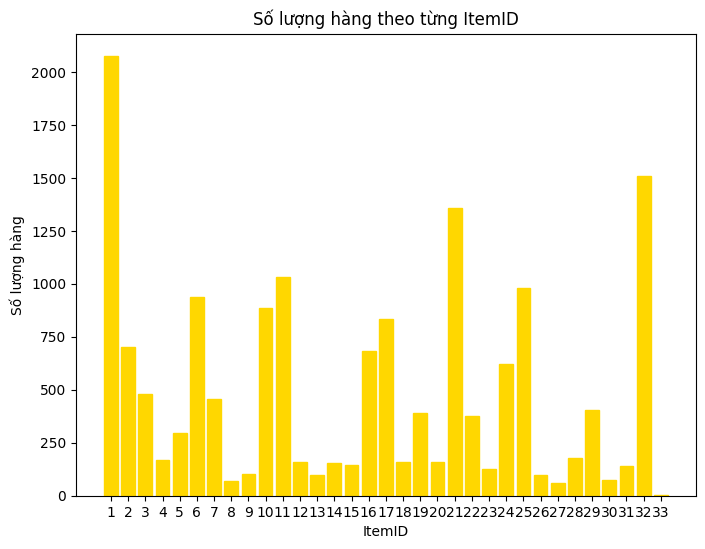

: 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
item_counts = interacts_df['ItemID'].value_counts()

# Chuẩn bị dữ liệu cho biểu đồ
item_ids = item_counts.index
counts = item_counts.values

# Vẽ biểu đồ cột và tô màu theo điều kiện ItemID từ 0 đến 3 (ví dụ)
plt.figure(figsize=(8, 6))
bars = plt.bar(item_ids, counts, color='skyblue')

# Tô màu các cột có ItemID từ 0 đến 3 là màu vàng
for i in range(33):  # Ví dụ từ 0 đến 33
    print(bars[i])
    bars[i].set_color('gold')

plt.xlabel('ItemID')
plt.ylabel('Số lượng hàng')
plt.title('Số lượng hàng theo từng ItemID')
plt.xticks(item_ids)
plt.show()